In [0]:
!wget -nc 'http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-proc.zip'
!unzip coil-20-proc.zip

In [0]:
FOLDER = 'coil-20-proc'
TOTAL_CLASS = 20

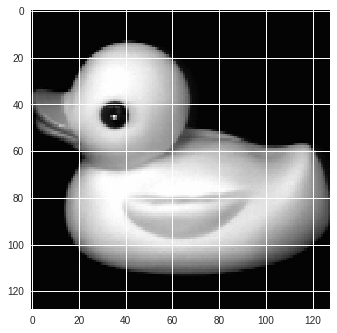

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(FOLDER + '/obj1__0.png')
img_cvt = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_cvt, cmap='gray')
plt.show()

In [0]:
img_cvt.shape

(128, 128)

In [0]:
import os, os.path

files = [name for name in os.listdir(FOLDER) if name.endswith('png')]
len(files)

1440

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

IMG_SIZE = img_cvt.shape[0]

data = np.empty((len(files), IMG_SIZE, IMG_SIZE), dtype=np.uint8)

for i, f in enumerate(files):
    numbers = f[3:-4].split('__')
    img = cv2.imread(FOLDER + '/' + f)
    img_cvt = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    data[(int(numbers[0])-1) * 72 + int(numbers[1]), ...] = img_cvt
    

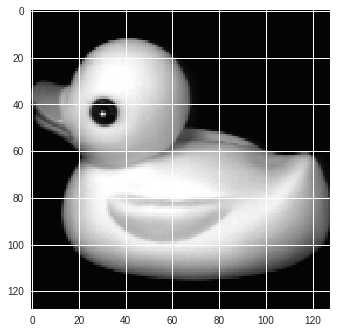

In [0]:
plt.imshow(data[2], cmap='gray')
plt.show()

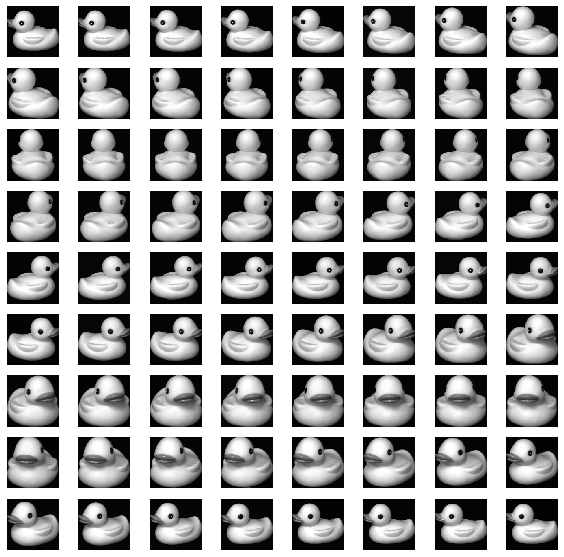

In [0]:
plt.figure(figsize=(10,10))
for i in range(72):
    plt.subplot(9,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i], cmap='gray')


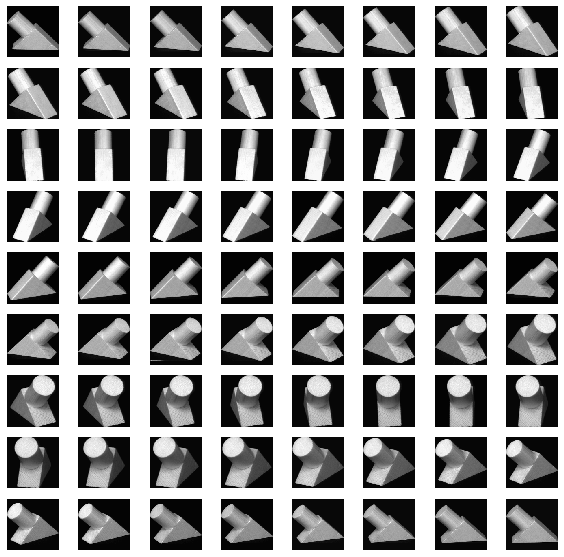

In [0]:
plt.figure(figsize=(10,10))
for i in range(72):
    plt.subplot(9,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[72 + i], cmap='gray')

# CNN

20 class
72 image each (5 degrees rotation)

In [0]:
import keras
from keras.layers import *

Using TensorFlow backend.


In [0]:
model = keras.Sequential([
        Convolution2D(16, (3,3), activation='relu', padding='same',), # input_shape=(IMG_SIZE,IMG_SIZE,1),),
        MaxPooling2D(pool_size=(2,2)),
        Convolution2D(32, (3,3), activation='relu', padding='same',),
        MaxPooling2D(pool_size=(2,2)),
        Convolution2D(64, (3,3), activation='relu', padding='same',),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(512, activation='relu'),    
        Dense(TOTAL_CLASS,  activation='softmax'),    
]) 

In [0]:
import tensorflow as tf
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
n = 72 * 11
train_images = data[:] / 255.0
train_images = train_images.reshape(train_images.shape[0], IMG_SIZE, IMG_SIZE, 1)
train_images.shape

(1440, 128, 128, 1)

In [0]:
train_labels = np.fromfunction(lambda i : i // 72, (train_images.shape[0],), dtype=int)
train_labels.shape


(1440,)

In [0]:
model.fit(train_images, train_labels, epochs=20)  

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1440/1440 [==============================] - 7s 5ms/step - loss: 0.9529 - acc: 0.7389
Epoch 2/20
1440/1440 [==============================] - 1s 841us/step - loss: 0.0303 - acc: 0.9944
Epoch 3/20
1440/1440 [==============================] - 1s 828us/step - loss: 0.0052 - acc: 0.9986
Epoch 4/20
1440/1440 [==============================] - 1s 828us/step - loss: 5.1879e-04 - acc: 1.0000
Epoch 5/20
1440/1440 [==============================] - 1s 841us/step - loss: 1.5518e-04 - acc: 1.0000
Epoch 6/20
1440/1440 [==============================] - 1s 828us/step - loss: 1.0569e-04 - acc: 1.0000
Epoch 7/20
1440/1440 [==============================] - 1s 826us/step - loss: 7.7128e-05 - acc: 1.0000
Epoch 8/20
1440/1440 [==============================] - 1s 835us/step - loss: 5.9835e-05 - acc: 1.0000
Epoch 9/20
1440/1440 [==============================] - 1s 836us/step - loss: 4.8340e-05 - acc: 1.0000
Epoch 10/20
1440/1440 [================